首先引入需要用到的套件，那我做的部分是隨機森林模型，隨機森林是將決策樹模型延伸的一種方式。隨機森林裡將每一顆決策樹當成一個弱學習器，然後將所有樹彙整成一個大的整體模型。這個模型運用的預測方式是用多數票機制，每顆樹會投票決定最終的預測結果。

隨機森林的優點是對於過擬合的狀況會有比較強的抵抗力，另外也可以透過計算特徵的重要性來了解每個特徵對模型的貢獻程度。但缺點是模型解釋性較差，因為她太多樹了，而且遇到高度不平衡的數據時，需要特別注意。

首先先引入需要的套件

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap
from sklearn import datasets, metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import pandas as pd

然後讀取這個糖尿病病例調查的檔案


In [4]:
df=pd.read_csv('diabetes_binary_health_indicators_BRFSS2021.csv')
df

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,0,1.0,1,15.0,1.0,0.0,0.0,0,1,...,1,0.0,5.0,10.0,20.0,0.0,0,11,4.0,5.0
1,1.0,1,0.0,1,28.0,0.0,0.0,1.0,0,1,...,1,0.0,2.0,0.0,0.0,0.0,0,11,4.0,3.0
2,1.0,1,1.0,1,33.0,0.0,0.0,0.0,1,1,...,1,0.0,2.0,10.0,0.0,0.0,0,9,4.0,7.0
3,1.0,0,1.0,1,29.0,0.0,1.0,1.0,1,1,...,1,0.0,5.0,0.0,30.0,1.0,1,12,3.0,4.0
4,0.0,0,0.0,1,24.0,1.0,0.0,0.0,0,0,...,1,0.0,3.0,0.0,0.0,1.0,1,13,5.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236373,1.0,1,1.0,1,21.0,0.0,0.0,0.0,1,1,...,1,0.0,4.0,0.0,0.0,0.0,1,10,2.0,3.0
236374,0.0,1,0.0,1,25.0,1.0,0.0,0.0,1,1,...,0,1.0,2.0,20.0,0.0,0.0,0,3,4.0,5.0
236375,0.0,0,1.0,1,31.0,0.0,0.0,0.0,1,1,...,1,0.0,2.0,0.0,0.0,0.0,1,7,6.0,10.0
236376,0.0,1,0.0,1,24.0,0.0,0.0,0.0,1,1,...,1,0.0,2.0,0.0,0.0,0.0,1,10,4.0,6.0


觀察一下資料

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 236378 entries, 0 to 236377
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       236378 non-null  float64
 1   HighBP                236378 non-null  int64  
 2   HighChol              236378 non-null  float64
 3   CholCheck             236378 non-null  int64  
 4   BMI                   236378 non-null  float64
 5   Smoker                236378 non-null  float64
 6   Stroke                236378 non-null  float64
 7   HeartDiseaseorAttack  236378 non-null  float64
 8   PhysActivity          236378 non-null  int64  
 9   Fruits                236378 non-null  int64  
 10  Veggies               236378 non-null  int64  
 11  HvyAlcoholConsump     236378 non-null  int64  
 12  AnyHealthcare         236378 non-null  int64  
 13  NoDocbcCost           236378 non-null  float64
 14  GenHlth               236378 non-null  float64
 15  

根據我們的討論和kaggle上其他人的參考解答，我們決定去掉收入和教育的欄位，因為相信這兩項應該會跟糖尿病的預測比較沒有關係。

In [7]:
df=df.drop(['Education','Income'],axis=1)
df

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age
0,0.0,0,1.0,1,15.0,1.0,0.0,0.0,0,1,1,0,1,0.0,5.0,10.0,20.0,0.0,0,11
1,1.0,1,0.0,1,28.0,0.0,0.0,1.0,0,1,0,0,1,0.0,2.0,0.0,0.0,0.0,0,11
2,1.0,1,1.0,1,33.0,0.0,0.0,0.0,1,1,1,0,1,0.0,2.0,10.0,0.0,0.0,0,9
3,1.0,0,1.0,1,29.0,0.0,1.0,1.0,1,1,1,0,1,0.0,5.0,0.0,30.0,1.0,1,12
4,0.0,0,0.0,1,24.0,1.0,0.0,0.0,0,0,0,0,1,0.0,3.0,0.0,0.0,1.0,1,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236373,1.0,1,1.0,1,21.0,0.0,0.0,0.0,1,1,1,0,1,0.0,4.0,0.0,0.0,0.0,1,10
236374,0.0,1,0.0,1,25.0,1.0,0.0,0.0,1,1,1,0,0,1.0,2.0,20.0,0.0,0.0,0,3
236375,0.0,0,1.0,1,31.0,0.0,0.0,0.0,1,1,1,0,1,0.0,2.0,0.0,0.0,0.0,1,7
236376,0.0,1,0.0,1,24.0,0.0,0.0,0.0,1,1,1,0,1,0.0,2.0,0.0,0.0,0.0,1,10


In [8]:
df.describe()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age
count,236378.000000,236378.000000,236378.000000,236378.000000,236378.000000,236378.000000,236378.000000,236378.000000,236378.000000,236378.000000,236378.000000,236378.000000,236378.000000,236378.000000,236378.000000,236378.000000,236378.000000,236378.000000,236378.000000,236378.000000
mean,0.142010,0.418558,0.402059,0.963347,28.953579,0.411997,0.038900,0.086548,0.779231,0.621259,0.827767,0.062083,0.962573,0.063737,2.480717,3.937710,3.751297,0.153948,0.477824,7.863930
std,0.349061,0.493324,0.490315,0.187909,6.552055,0.492196,0.193356,0.281172,0.414766,0.485074,0.377583,0.241306,0.189807,0.244284,1.029134,7.886506,8.245907,0.360900,0.499509,3.236997
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,28.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000
75%,0.000000,1.000000,1.000000,1.000000,32.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,3.000000,4.000000,2.000000,0.000000,1.000000,10.000000
max,1.000000,1.000000,1.000000,1.000000,99.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000


將這個檔案的值都轉為整數。

In [9]:
df['Diabetes_binary']=df['Diabetes_binary'].astype(int)
df

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age
0,0,0,1.0,1,15.0,1.0,0.0,0.0,0,1,1,0,1,0.0,5.0,10.0,20.0,0.0,0,11
1,1,1,0.0,1,28.0,0.0,0.0,1.0,0,1,0,0,1,0.0,2.0,0.0,0.0,0.0,0,11
2,1,1,1.0,1,33.0,0.0,0.0,0.0,1,1,1,0,1,0.0,2.0,10.0,0.0,0.0,0,9
3,1,0,1.0,1,29.0,0.0,1.0,1.0,1,1,1,0,1,0.0,5.0,0.0,30.0,1.0,1,12
4,0,0,0.0,1,24.0,1.0,0.0,0.0,0,0,0,0,1,0.0,3.0,0.0,0.0,1.0,1,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236373,1,1,1.0,1,21.0,0.0,0.0,0.0,1,1,1,0,1,0.0,4.0,0.0,0.0,0.0,1,10
236374,0,1,0.0,1,25.0,1.0,0.0,0.0,1,1,1,0,0,1.0,2.0,20.0,0.0,0.0,0,3
236375,0,0,1.0,1,31.0,0.0,0.0,0.0,1,1,1,0,1,0.0,2.0,0.0,0.0,0.0,1,7
236376,0,1,0.0,1,24.0,0.0,0.0,0.0,1,1,1,0,1,0.0,2.0,0.0,0.0,0.0,1,10


接下來將變數分成x跟y。X是去掉第一列後剩下的欄目，y則是只有第一列。

In [11]:
x=df[df.columns[1:]]
x

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age
0,0,1.0,1,15.0,1.0,0.0,0.0,0,1,1,0,1,0.0,5.0,10.0,20.0,0.0,0,11
1,1,0.0,1,28.0,0.0,0.0,1.0,0,1,0,0,1,0.0,2.0,0.0,0.0,0.0,0,11
2,1,1.0,1,33.0,0.0,0.0,0.0,1,1,1,0,1,0.0,2.0,10.0,0.0,0.0,0,9
3,0,1.0,1,29.0,0.0,1.0,1.0,1,1,1,0,1,0.0,5.0,0.0,30.0,1.0,1,12
4,0,0.0,1,24.0,1.0,0.0,0.0,0,0,0,0,1,0.0,3.0,0.0,0.0,1.0,1,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236373,1,1.0,1,21.0,0.0,0.0,0.0,1,1,1,0,1,0.0,4.0,0.0,0.0,0.0,1,10
236374,1,0.0,1,25.0,1.0,0.0,0.0,1,1,1,0,0,1.0,2.0,20.0,0.0,0.0,0,3
236375,0,1.0,1,31.0,0.0,0.0,0.0,1,1,1,0,1,0.0,2.0,0.0,0.0,0.0,1,7
236376,1,0.0,1,24.0,0.0,0.0,0.0,1,1,1,0,1,0.0,2.0,0.0,0.0,0.0,1,10


In [10]:
y=df['Diabetes_binary']
y

0         0
1         1
2         1
3         1
4         0
         ..
236373    1
236374    0
236375    0
236376    0
236377    0
Name: Diabetes_binary, Length: 236378, dtype: int32

接著要清理的是重覆的數據，我們用到的是duplicate這個函數，首先先看一下重複數據的數量，然後將他們清除。

In [13]:
df.duplicated().sum()


52148

In [14]:
df.drop_duplicates(inplace=True)
print(df.duplicated().sum())

0


接著就是預測模型的部分，首先將訓練集和測試集切割，我選擇的是切成37，跟當初我們上鐵達尼號例子是切同樣的比例，因為其實我一開始參考的例子是切成82，但結果出來比較好，所以這邊應該算是第一個模型調整的地方。

下面的print shape是看他訓練集和測試集的形狀，像第一個x訓練集就是165464行和19列。

In [16]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y,test_size=0.3,random_state=100)
print("xtrain shape: ", xtrain.shape)
print("xtest shape: ", xtest.shape)
print("ytrain shape: ", ytrain.shape)
print("ytest shape: ", ytest.shape)

xtrain shape:  (165464, 19)
xtest shape:  (70914, 19)
ytrain shape:  (165464,)
ytest shape:  (70914,)


接下來是用到了找隨機森林最佳參數組合的GridSearchCV這個模型，它的基本思想是在指定的超參數範圍內均勻取值，將每一種組合都試一遍，最後選擇性能最好的一組超參數，像是max_depth的意思就是樹的最大深度，有5、10、15三種，下面的estimator則是有50、100、150棵樹的可能都試一遍，這樣3*3就會試九次，這就凸顯他的缺點:可能會跑比較久，而且這只是尋找最適參數組合的部分，還沒進入到模型建構。(由下面可知跑了快十分鐘...)

In [17]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [5, 10, 15],
    'n_estimators': [50, 100, 150]
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5)
grid_search.fit(xtrain, ytrain)


best_params = grid_search.best_params_

接著就是將找到的最適組合運用在模型上，首先先用最佳參數建構隨機森林模型，接著是fit擬合模型，接著就是進行預測和看分數。

In [18]:

best_rf_model = RandomForestClassifier(n_estimators=best_params['n_estimators'], 
                                       max_depth=best_params['max_depth'], 
                                       random_state=42)


best_rf_model.fit(xtrain, ytrain)


ypred = best_rf_model.predict(xtest)


from sklearn.metrics import classification_report
print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

           0       0.87      0.99      0.93     60948
           1       0.61      0.09      0.16      9966

    accuracy                           0.86     70914
   macro avg       0.74      0.54      0.54     70914
weighted avg       0.83      0.86      0.82     70914



最後做出來的精確度，在類別0方面是87%，類別1是61%；召回率的部分，類別0是幾乎完美的99%，類別1則是可悲的9%，總體的F1分數類別0是0.93，類別1是0.16，那我猜測是類別1的樣本是類別0的六分之一，這可能是預測不夠精準的原因，這可能也導致整體模型的不平均。但整體預測的準確率還是有86%，感覺還行?

那以下是上課有教過的一些評價模型的分數，大家就稍微看一下。(這其實就是上面那個矩陣的分數拆開來看啦。)

In [19]:
from sklearn.metrics import confusion_matrix,accuracy_score, recall_score, precision_score
accuracy_score(ytest,ypred)

0.8638491694164763

In [20]:
recall_score(ytest,ypred)

0.08900260887015854

In [21]:
precision_score(ytest,ypred)

0.6062884483937115

那最後就是畫了個圖讓大家看看Type1和Type2 error。

[[60372   576]
 [ 9079   887]]


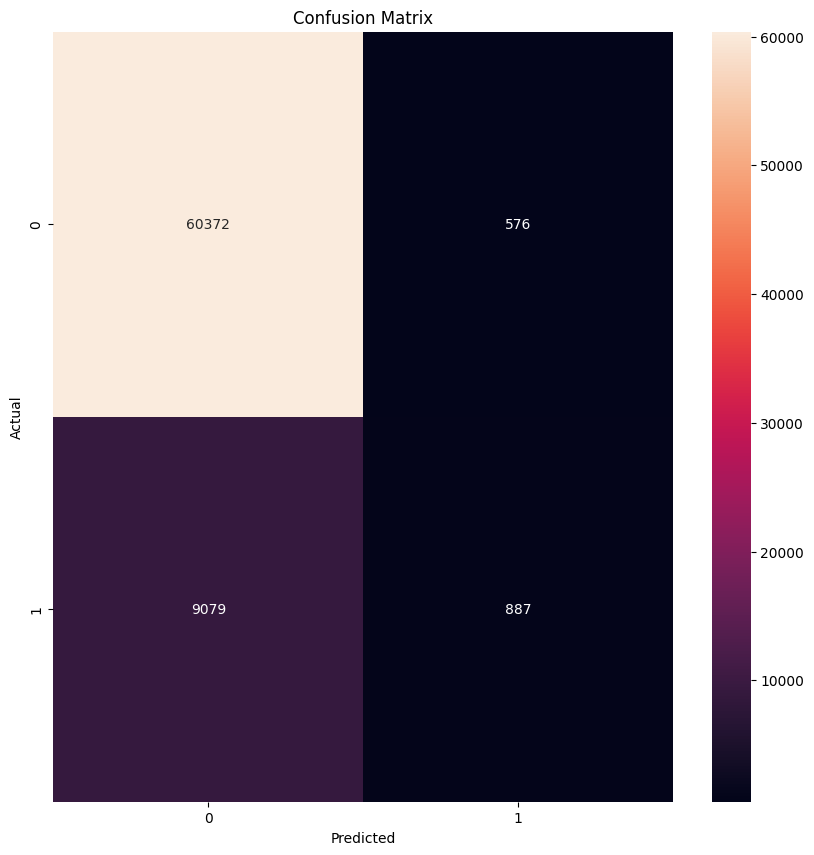

In [22]:
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(ytest, ypred)
print(cm)
plt.figure(figsize=(10,10))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()